### Construction of a molecular Dyamic model: Coding MD from scract:

Resources: https://www.youtube.com/watch?v=ChQbBqndwIA

In [1]:
import numpy as np
n = 5 # number of molecules
D = 3 # dimensions
dt = 0.1

# array of variables: 
r = 100.0 * np.random.rand(n,D) # initialize all the random positions 
v = 100.0 * (np.random.rand(n, D) - 0.5) # initialize with random velocity

In [2]:
r

array([[60.90862946, 24.85445068, 44.15437139],
       [96.33278495, 93.215042  , 30.42371108],
       [99.60013814,  2.02738616, 50.08541164],
       [29.74844591, 29.57521719, 97.26667069],
       [98.27195416, 81.00541811, 20.82978563]])

In [3]:
v

array([[-45.35022302,  -6.98361004, -35.23212523],
       [ 49.55386201, -28.77150939,   8.00019821],
       [ 26.90142351, -17.38980097,  30.86680938],
       [-11.55070594,  12.01460887,  22.19422056],
       [  1.82748125, -20.42326638, -48.32088999]])

In [4]:
# update subroutine
def update (r,v,dt): 
    newr = r + v * dt; 
    return newr

In [5]:
for i in range(100):
    r = update(r,v,dt)
    print(i)
    print(r)


0
[[ 56.37360716  24.15608968  40.63115887]
 [101.28817115  90.33789106  31.2237309 ]
 [102.29028049   0.28840606  53.17209258]
 [ 28.59337531  30.77667808  99.48609275]
 [ 98.45470229  78.96309147  15.99769663]]
1
[[ 51.83858486  23.45772868  37.10794635]
 [106.24355735  87.46074012  32.02375072]
 [104.98042285  -1.45057404  56.25877352]
 [ 27.43830472  31.97813897 101.70551481]
 [ 98.63745041  76.92076484  11.16560763]]
2
[[ 47.30356256  22.75936767  33.58473383]
 [111.19894355  84.58358918  32.82377054]
 [107.6705652   -3.18955413  59.34545446]
 [ 26.28323412  33.17959985 103.92493686]
 [ 98.82019854  74.8784382    6.33351863]]
3
[[ 42.76854026  22.06100667  30.0615213 ]
 [116.15432975  81.70643825  33.62379036]
 [110.36070755  -4.92853423  62.43213539]
 [ 25.12816353  34.38106074 106.14435892]
 [ 99.00294666  72.83611156   1.50142963]]
4
[[ 38.23351795  21.36264566  26.53830878]
 [121.10971595  78.82928731  34.42381018]
 [113.0508499   -6.66751433  65.51881633]
 [ 23.97309293  35.5

In [6]:
import numpy as np

# for plotting: 
import matplotlib
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
%matplotlib inline 
import matplotlib.pyplot as plt 




In [7]:
# paramters

n = 5; # number of molecules
D = 3; # dimensions 
LL = 100; # length of the box 
dt = 0.01; 

L = np.zeros ([D]) + LL # initialize the box length 


In [ ]:
r = LL*np.random.rand(n,D) # initialize all random positions 
v = 100.0 * (np.random.rand(n,D) - 0.5) # initialize with random velocity 


# subroutine for updating the positions and velocities: 
# r = position, v = velocity, dt = time step 
# subroutine means that it is a function that is used to update the positions and velocities 
def update(r, v, dt, BC): 
    newr = r + v * dt
    newv = v.copy()  # Make a copy to avoid modifying the original
    
    if BC == 0:  # periodic boundaries
        newr = (r + v * dt) % L
    elif BC == 1:  # bounce back boundaries 
        for i in range(n):  # Loop through particles
            for j in range(D):  # Loop through dimensions for each particle
                if newr[i, j] < 0: 
                    newr[i, j] = -newr[i, j]
                    newv[i, j] = -newv[i, j]
                elif newr[i, j] > L[j]: 
                    newr[i, j] = L[j] - (newr[i, j] - L[j])
                    newv[i, j] = -newv[i, j]
                    
    # To-do: force the atom to move if it hits the boundary: 
    
    return newr, newv


# A subroutine for checking if the atom past the boundary: 
def reflectBC(r,v): 
    # store a new copy of the velocity and position: 
    newv = v.copy()
    newr = r.copy()
    for i in range(n): 
        for j in range(D): 
            # if the atom is past the lower boundary, reflect it back: 
            if newr[i, j] < 0: # < 0 means that the atom is past the boundary
                newr[i, j] = -newr[i, j]
                newv[i, j] = abs(v[i, j])
                
                
            if newr[i, j] > L[j]: # > L[j] means that the atom is past the upper boundary
                newr[i, j] = 2.0 * L[j] - newr[i, j]
                newv[i, j] = -abs(v[i, j])
    return newr, newv


```python
if newr[i, j] < 0: # < 0 means that the atom is past the boundary
                newr[i, j] = -newr[i, j]
                newv[i, j] = abs(v[i, j])
                
```

- the above code segment: 
    - if it past the lower boundary, i.e if the coordinate in the Jth dimension is less than 0, reflect the position about 0.
    - Then set the velocity to point into the box. i.e. make its component in that dimension point in the positive direction. 

```python
 if newr[i, j] > L[j]: # > L[j] means that the atom is past the upper boundary
                newr[i, j] = 2.0 * L[j] - newr[i, j]
                newv[i, j] = -abs(v[i, j])
```
- same logic here, but check the upper boundary

In the code above: 
 the function `update` has a parameter namely BC (boundary conditions): 
  - When BC = 0 (Periodic boundaries): 
     - If a particle moves beyond one side of the box, it reappears on the opposite side. 
     - This is like a "wrap-around" effect, similar to how Pac-Man moves off one edge of the screen and comes back on the other.
     - Useful for simulating bulk properties without edge effects.
  - When BC = 1 (Bounce back boundaries): 
     - If a particle hits a wall (i.e., goes beyond the box boundary), it "bounces" back into the box.
     - The component of its velocity perpendicular to the wall is reversed (changes sign), simulating an elastic collision with the wall.
     - This keeps all particles inside the box at all times.
     - At such condition, both the velocity and the direction of the ball reverse upon hitting the wall. 

KeyboardInterrupt: 

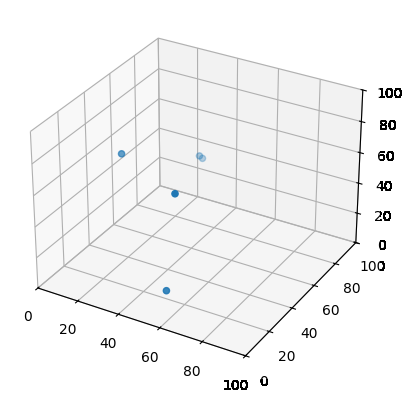

In [ ]:
# Version with periodic boundaries: 
fig = plt.figure()
for i in range(1000): 
    r, v = update(r,v,dt, False) 
    ax = plt.axes(projection = '3d')
    ax.set_xlim(0, L[0])
    ax.set_ylim(0, L[1])
    ax.set_zlim(0, L[2])
    ax.scatter3D([item[0] for item in r], [item[1] for item in r], [item[2] for item in r])
    
    # the above line is the same as: 
    # ax.scatter3D(r[:,0], r[:,1], r[:,2])
    # which implies that the x, y, z coordinates are the first, second, and third columns of the r array, respectively. 
    
    display.clear_output(wait = True)
    display.display(plt.gcf())
    

plt.figure()


- Note that at this point, we fail to stop them from moving in their corresponding trajectory if we didnt set the correct behavios for the molecules. In order to make this simulation more realistic, we have to consider what they will do when they reach the boundary, i.e. boundary condition.  

- There are two approaches we can adopt in our simulation:
- **Periodic boundaries**: Like living on a torus or in a pac-man universe. When a particle exits one side of the box, it re-enters from the opposite side, as if the space is seamlessly connected. Useful when we are simulating in the environment of a crystal or so. Or a special case of periodic boundaries: looking at crystals/ other system with periodic symmetry. 

- **Bounce back**: When a particle reaches the boundary of the box, it reflects off the wall, reversing the component of its velocity perpendicular to the wall, similar to a ball bouncing off a surface.

KeyboardInterrupt: 

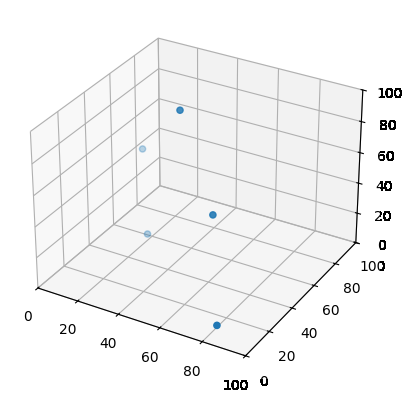

In [11]:
# Version with bouncing off: 
fig = plt.figure()
for i in range(1000): 
    r, v = update(r,v,dt, True) 
    ax = plt.axes(projection = '3d')
    ax.set_xlim(0, L[0])
    ax.set_ylim(0, L[1])
    ax.set_zlim(0, L[2])
    ax.scatter3D([item[0] for item in r], [item[1] for item in r], [item[2] for item in r])
    
    display.clear_output(wait = True)
    display.display(plt.gcf())